# **Edit Distance**

### **Document similarity**

* "The students were able to appreciate the concept optimal substructure property and its use in designing algorithms"
* "The lecture taught the students to appreciate how the concept of optimal substructures can be used in designing algorithms"
* Edit operations to transform documents
  - Insert a character
  - Delete a character
  - Substitute one character by another
* "The <u>lecture taught the</u> ~~students were able~~ to appreciate <u>how</u> the concept <u>of</u> optimal substructure<u>s</u> ~~property~~ <u>c</u>an~~d~~ ~~it~~bs~~e~~ use<u>d</u> in designing algorithms"
* <u>insert</u>, ~~delete~~, ~~subst~~itute

**Edit distance**
* Minimum number of edit operations needed
* In our example, 24 characters <u>inserted</u>, 18 ~~deleted~~, 2 ~~subst~~ituted
* Edit distance is at most 44

### **Edit distance**

* Minimum number of editing operations needed to transform one document to the other
  - Insert a character
  - Delete a character
  - Substitute one character by another
* Also called Levenshtein distance
  - Vladimir Levenshtein, 1965
* Applications
  - Suggestions for spelling correction
  - Genetic similarity of species

**Edit distance and LCS**
* Longest common subsequence of $u, v$
  - Minimum number of deletes needed to make them equal
* Deleting a letter from $u$ is equivalent to inserting it in $v$
  - `bisect, secret` - LCS is `sect`
  - Delete `b, i` in `bisect` and `r, e` in `secret`
  - Delete `b, i` and then insert `r, e` in  `bisect`
* LCS equivalent to edit distance without substitution

### **Inductive structure for edit distance**

* $u = a_0a_1...a_{m-1}$
* $v = b_0b_1...b_{n-1}$
* Recall LCS
* If $a_i=b_j$, $LCS(i,j) = 1 + LCS(i+1,j+1)$
* if $a_i \neq b_j$, $LCS(i,j) = max(LCS(i,j+1), LCS(i+1,j))$
* Edit distance - aim is to transform $u$ to $v$
* If $a_i=b_j$, nothing to be done
* If $a_i \neq b_j$, best among
  - Substitute $a_i$ by $b_j$
  - Delete $a_i$
  - Insert $b_j$ before $a_i$
* $ED(i, j)$ - edit distance for $a_ia_{i+1}...a_{m-1}, b_jb_{j+1}...b_{n-1}$
* If $a_i = b_j$, $ED(i, j) = ED(i+1,j+1)$
* If $a_i \neq b_j$, $ED(i, j) = 1 + min(ED(i+1,j+1), ED(i+1,j), ED(i,j+1))$
* Base case
  - $ED(m,n)=0$
  - $ED(i,n)=m-i$ for all $0 \leq i \leq m$, Delete $a_ia_{i+1}...a_{m-1}$ fro $u$
  - $ED(m,j)=n-j$ for all $0 \leq j \leq n$, Insert $b_jb_{j+1}...b_{n-1}$ into $u$

### **Subproblem dependency**

* Subproblems are $ED(i, j),$ for $0 \leq i \leq m, 0 \leq j \leq n$
* Table of $(m+1).(n+1)$ values

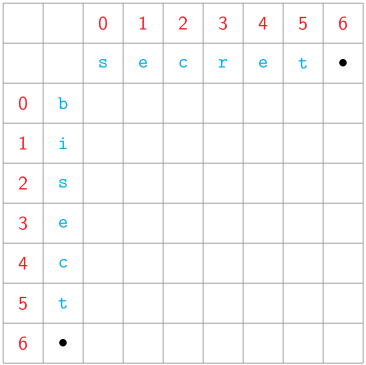

* Like LCS, $ED(i,j)$ depends on $ED(i+1,j+1), ED(i,j+1), ED(i+1,j)$

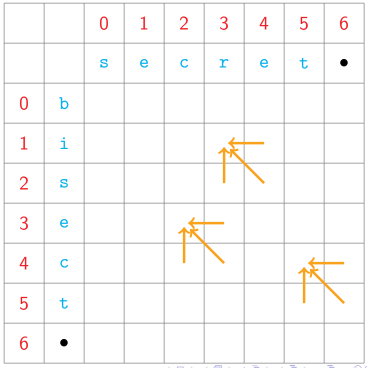

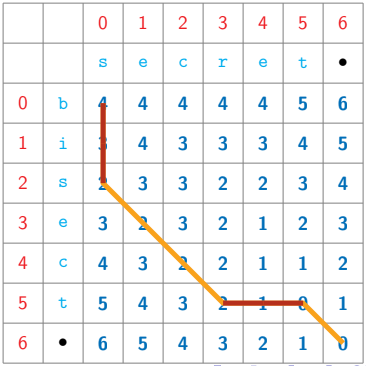

* No dependency for $ED(m,n)$ - start at bottom right and fill by row, column or diagonal

**Reading off the solution**
* Transform `bisect` to `secret`
* Delete `b`, Delete `i`, Insert `r`, Insert `e`

In [ ]:
def ED(u, v):
  import numpy as np
  (m, n) = (len(u), len(v))
  ed = np.zeros((m + 1, n + 1))

  for i in range(m - 1, -1, -1):
    ed[i, n] = m - i
  for j in range(n - 1, -1, -1):
    ed[m, j] = n - j
  
  for j in range(n - 1, -1, -1):
    for i in range(m - 1, -1, -1):
      if u[i] == v[j]:
        ed[i, j] = ed[i + 1, j + 1]
      else:
        ed[i, j] = 1 + min(ed[i + 1, j + 1], ed[i, j + 1], ed[i + 1, j])

**Complexity**
* Again, $O(mn)$, using dynamic programming or memoization
  - Fill a table of size $O(mn)$
  - Each table entry takes constant time to compute